# Variables Aleatorias Discretas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png" width="200px" height="180px" />

> Habiendo estudiado el repaso de teoría de probabilidad, empezaremos por estudiar variables aleatorias discretas.


> **Objetivos:**
> - Repasar la definición de variables aleatorias discretas.
> - Repasar las variabels aleatorias de Bernoulli, binomial y geométricas, y los fenómenos que modelan.
> - Definir la función de masa de probabilidad y la función de distribución acumulada, usando tablas o fórmulas.
> - Definir el valor esperado (media) de una VA discreta.


> **Referencias:**
> 
> - Pattern Recognition and Machine Learning, by Christopher M. Bishop. Cap 1.2.
> - https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2022/mit18_05_s22_probability.pdf


<p style="text-align:right;"> Imagen recuperada de: https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png.</p>

___

## 0. Recap

- Un espacio muestral discreto $\Omega$ es un conjunto finito o enumerable de resultados $\Omega = \{\omega_1, \omega_2, \dots\}$.

- La probabilidad de un resultado $\omega$ es $p(\omega)$.

- Un evento $E$ es un subconjunto de $\Omega$. La probabilidad de un evento $E$ es $p(E) = \sum_{\omega \in E} p(\omega)$.

## 1. Variables aleatorias (VA) discretas

**Definición.** Sea $\Omega$ un espacio muestral discreto. Una VA discreta es una función

$$
X: \Omega \to \mathbb{R}.
$$


**Ejemplo.** Supongamos que jugamos con dos dados.

Al tirarlos, los resultados son:

$$
\Omega = \{(i,j): i,j=1, 2, \dots, 6\}.
$$

La función de probabilidad, si los dados son justos, es $p(i, j) = \frac{1}{36}$.

Supongamos que estamos en un juego, donde ganamos $500 si la suma de $i$ y $j$ es 7. Caso contrario perdemos $100. Podemos definir una VA discreta con esta función de pago:

$$
X(i,j) = \left\lbrace
\begin{array}{lc}
500  &  \text{if } i+j=7 \\ 
-100 &  \text{if } i+j\neq7
\end{array}
\right .
$$

![dice](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/2-Dice-Icon.svg/600px-2-Dice-Icon.svg.png)

**Definición.** La función de masa de probabilidad (pmf por sus siglas en inglés) de una VA discreta es la función $p(a) = p(X=a)$.

Es fácil notar que:

- $0 \leq p(a) \leq 1$.
- $a$ puede ser cualquier número. Si $a$ es un número que $X$ nunca toma, entonces $p(a)=0$.

**Ejemplo.** Consideramos el tiro de un solo dado. El dado está cargado, de modo que solo salen los valores $1$, $5$ y $6$, y de modo que la función de probabilidad sea:
$$
p(X) = \left\{\begin{array}{cc }0.3 & X=1 \\ 0.3 & X=5 \\ 0.4 & X=6\end{array}\right.
$$

In [1]:
# Importar scipy.stats
from scipy import stats

In [12]:
# Definir listas de valores de X y probabilidades asociadas
xk = [1,2,3,4,5,6]
pk = [0.3,0,0,0,0.3,0.4]
X = stats.rv_discrete(
    name='X',
    values=[xk,pk]
)



x = stats.rv_discrete(
    name='X',
    values=((1,5,6),
            [0.3,0.3,0.4]
    )
)

# Equivalentemente


In [6]:
from matplotlib import pyplot as plt

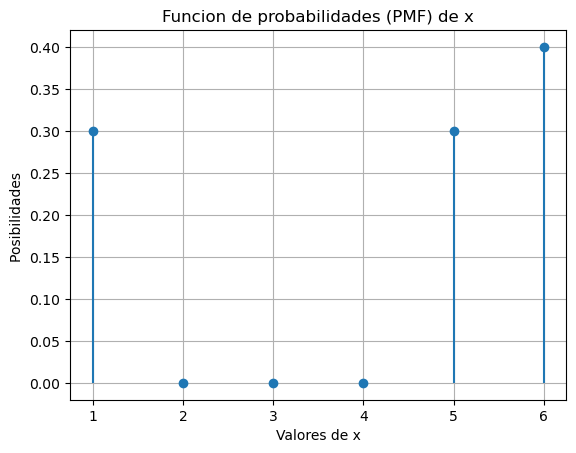

In [8]:
# Grafico
plt.stem(xk, pk, basefmt=" ")
plt.xlabel('Valores de x')
plt.ylabel('Posibilidades ')
plt.title('Funcion de probabilidades (PMF) de x')
plt.grid()
plt.show()

**Definición.** La función de distribución acumulada (cdf por sus siglas en inglés) de una VA discreta $X$ es la función $F$ dada por $F(a) = p(X \leq a)$.

**Ejemplo.** Considerando el ejemplo anterior, tenemos que:

|  x  |  1  |  2  |  3  |  4  |  5  |  6  |
| --- | --- | --- | --- | --- | --- | --- |
| p(x)| 0.3 |  0  |  0  |  0  | 0.3 | 0.4 |
| F(x)| 0.3 | 0.3 | 0.3 | 0.3 | 0.6 |  1  |

**Propiedades:**

- $F$ es no decreciente. Es decir, su gráfica nunca decrece.
- $0 \leq F(a) \leq 1$.
- $\lim_{a \to \infty} F(a) = 1$.
- $\lim_{a \to -\infty} F(a) = 0$.

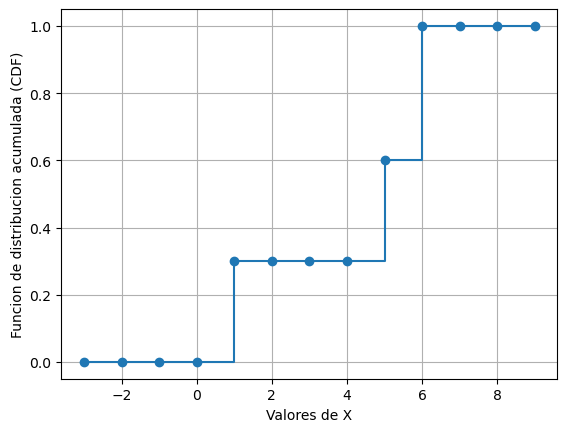

In [13]:
# Grafico
x = range(-3, 10)
plt.plot(x, X.cdf(x), marker='o', linestyle='-', drawstyle='steps-post')
plt.xlabel('Valores de X')
plt.ylabel('Funcion de distribucion acumulada (CDF)')
plt.grid()
plt.show()

In [14]:
import numpy as np

In [17]:
X.cdf(-np.inf) #0.0

0.0

In [18]:
X.cdf(np.inf) #1.0

1.0

## 2. Distribuciones específicas

### 2.1. Distribución de Bernoulli

La distribución de Bernoulli modela una ejecución de un experimento con dos posibles resultados, normalmente denominados éxito y fracaso. Es una de las distribuciones más importantes, y a la vez la más simple.

Decimos que una VA $X$ sigue una distribución de Bernoulli con parámtro $p$ si:

- $X$ solo puede tomar los valores $0$ y $1$.
- $p(X=1) = p$ y $p(X=0)=1-p$.

Denotamos esto como $X \sim \text{Bernoulli}(p)$.

**Ejemplos.** Con la distribución de Bernoulli se pueden modelar los siguientes fenómenos.

- Tiro de una moneda. $p$ es la proporción de veces que cae cara.
- Votos a favor de una propuesta. $p$ es la proporción de votos a favor de la propuesta.
- En un clasificador binario, normalmente la salida la modelamos con una VA de Bernoulli, con parámetro desconocido.

In [19]:
# Variable aleatoria de Bernoulli con p=0.7
B = stats.bernoulli(p=0.7)

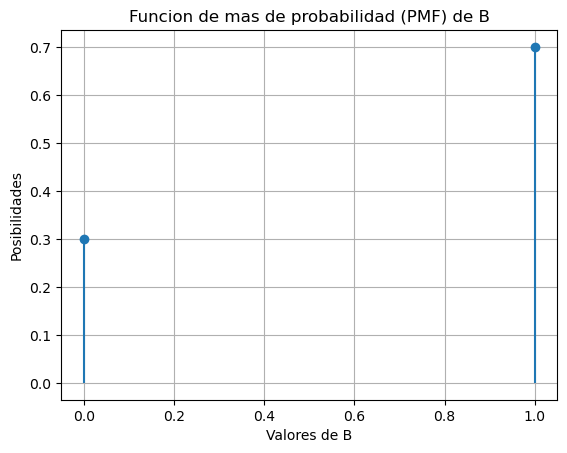

In [20]:
xk = [0, 1]
pk = B.pmf(xk)
plt.stem(xk, pk, basefmt=" ")
plt.xlabel('Valores de B')
plt.ylabel('Posibilidades')
plt.title('Funcion de mas de probabilidad (PMF) de B')
plt.grid()
plt.show()

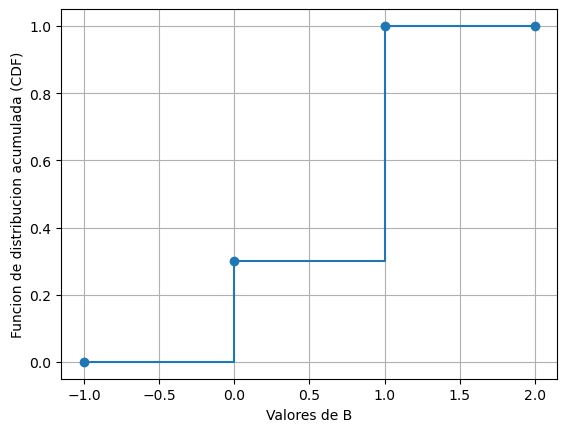

In [22]:
# Grafico
x = range(-1 , 3)
plt.plot(x, B.cdf(x), marker='o', linestyle='-', drawstyle='steps-post')
plt.xlabel('Valores de B')
plt.ylabel('Funcion de distribucion acumulada (CDF)')
plt.grid()
plt.show()

📌 **Características clave:**
- Un solo ensayo con dos resultados posibles: **éxito** o **fracaso**.
- Se define únicamente por la probabilidad de éxito \(p\).
- Ejemplos: lanzar una moneda una vez, verificar si un producto está defectuoso.

**Pistas para identificarla:**
- Solo hay **un intento**.
- El resultado es dicotómico (sí/no, éxito/fracaso, 1/0).


### 2.2. Distribución Binomial

La distribución binomial, $\text{Binomial}(n, p)$, modela el número de éxitos en $n$ tiros independientes de un experimento $\text{Bernoulli}(p)$.

Es decir, un solo experimento de Bernoulli corresponde, por ejemplo, al tiro de una moneda. Un solo experimento Binomial consiste de $n$ experimentos de Bernoulli.

El espacio de resultados de Bernoulli es $\{0, 1\}$. El espacio de resultados de Binomial son secuencias de longitud $n$ de ceros y/o unos.

Mientras que una VA de Bernoulli puede tomar valores $0$ o $1$, una VA binomial puede tomar valores $0, 1, \dots, n$.

Denotamos esto como $X \sim \text{Binomial}(n, p)$.

La pmf de una distribución binomial es:

$$
p(a) = \left(\begin{array}{c}n \\ a \end{array}\right) p^a (1 - p)^{n-a}
$$

Si hacemos $n=1$, $\text{Binomial}(1, p) = \text{Bernoulli}(p)$.

**Ejemplo.** Grafiquemos algunas distribuciones binomiales:

In [27]:
# Distribucion binomial con n=10 y p=0.7
n = 10
p = 0.7
p2 = 0.4
Binom1 = stats.binom(n=n, p=p)
Binom2 = stats.binom(n=n, p=p2)

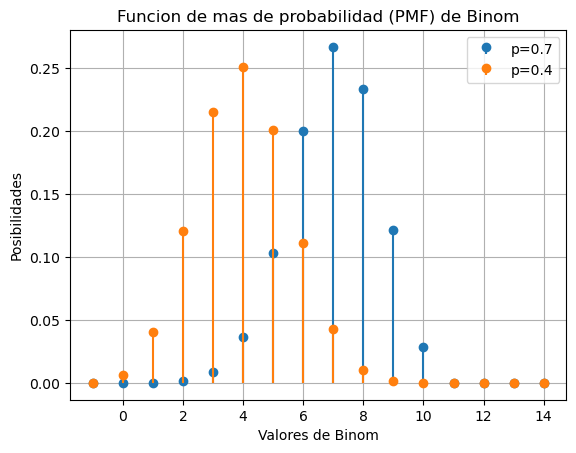

In [30]:
x = range(-1,15)
pk1 = Binom1.pmf(x)
pk2 = Binom2.pmf(x)
plt.stem(x, pk1, basefmt=" ", label='p=0.7')
plt.stem(x, pk2, basefmt=" ", linefmt='C1-', markerfmt='C1o', label='p=0.4')
plt.xlabel('Valores de Binom')
plt.ylabel('Posibilidades')
plt.title('Funcion de mas de probabilidad (PMF) de Binom')
plt.grid()
plt.legend()
plt.show()

📌 **Características clave:**
- Número fijo de ensayos \(n\), independientes y con la misma probabilidad de éxito \(p\).
- La variable es el **número de éxitos** obtenidos en los \(n\) ensayos.
- Ejemplos: número de caras al lanzar una moneda 10 veces, cantidad de clientes que compran en un día.

**Pistas para identificarla:**
- Hay **varios intentos** (\(n > 1\)) y son independientes.
- Mismo valor de \(p\) en cada ensayo.
- La variable aleatoria cuenta cuántos éxitos ocurren.


### 2.3. Distribución geométrica.

La distribución geométrica modela el número de fracasos antes del primer éxito en una secuencia de experimentos de Bernoulli.

La VA $X$ sigue una distribución geométrica con parámetro $p$ si,

- $X$ toma los valores $0, 1, 2, \dots$
- Su pmf está dada por $p(a) = p (1 - p)^{a}$.

La denotamos como $Geom(p)$.

**Ejemplo.** Grafiquemos algunas distribuciones geométricas:

In [ ]:
p= 0.7 
Geom = stats.geom(p=p)

In [ ]:
#Grafica de la Geom
xk = [0, 1]
pk = B.pmf(xk)
plt.stem(xk, pk, basefmt=" ")
plt.xlabel('Valores de B')
plt.ylabel('Posibilidades')
plt.title('Funcion de mas de probabilidad (PMF) de B')
plt.grid()
plt.show()

In [ ]:
# Grafico


In [ ]:
# Grafico


📌 **Características clave:**
- Modela el número de ensayos **hasta el primer éxito**.
- Probabilidad de éxito constante \(p\).
- Ejemplos: cantidad de tiros libres necesarios hasta encestar, llamadas hasta contactar a un cliente.

**Pistas para identificarla:**
- Se cuentan los intentos hasta que ocurra un éxito por primera vez.
- No se fija un número de ensayos de antemano.


### Ejemplo:

Lee cada situación y determina:
1. Qué distribución es la más apropiada (Bernoulli, Binomial o Geométrica).
2. Cuáles son sus parámetros (\( p \), \( n \) si aplica).
3. Explica tu razonamiento.

---

#### Ejercicio 1
En un control de calidad, un chip electrónico puede estar defectuoso o no. La probabilidad de que sea defectuoso es 0.015.

---

#### Ejercicio 2
Un call center logra contactar al cliente que necesita en cada llamada con probabilidad 0.3. Se mide el número de llamadas necesarias hasta hablar con el cliente correcto.

---

#### Ejercicio 3
En una encuesta, el 73.4% de los encuestados están a favor de la propuesta de semana laboral de 4 días. Se elige una persona al azar y se observa si está a favor.

---

#### Ejercicio 4
La probabilidad de que un usuario haga clic en un anuncio en línea es 0.08. Se muestran 100 anuncios a distintos usuarios y se cuenta el total de clics.

---

#### Ejercicio 5
En un juego de basketball, la probabilidad de encestar un tiro libre es 0.75. Se mide el número de intentos hasta encestar por primera vez.

---

#### Ejercicio 6
El 2% de las botellas producidas presenta una falla en el sellado. Se inspeccionan 50 botellas seleccionadas aleatoriamente y se cuenta cuántas fallan.

---

**Espacio para respuestas:**

| Ejercicio | Distribución | Parámetros    | Justificación breve |
|-----------|--------------|---------------|---------------------|
| 1         | Bernoulli    | p=0.015       |                     |
| 2         | Geométrica   | p=0.3         |                     |
| 3         | Bernoulli    | p=0.734       |                     |
| 4         | Binomial     | n=100; p=0.08 |                     |
| 5         | Geométrica   | p=0.75        |                     |
| 6         | Binomial     | n=50; p=0.02  |                     |

## 🔍 Diagrama de decisión rápido

      ¿Solo un ensayo?
            ├── Sí → Bernoulli
            └── No
      ¿Se fija n y se cuentan éxitos en n ensayos?
            ├── Sí → Binomial
            └── No
      ¿Se cuentan intentos hasta el primer éxito?
            ├── Sí → Geométrica
            └── Requiere otro modelo

# 3. Valor esperado y varianza.

**Ejemplo.** Suponga que tiene un dado justo con cinco 3's y un 6. ¿Cuál esperaría que fuera el promedio de 6000 tiros?

> Tablero.

**Ejemplo.** Se tiran dos dados de seis caras. Si ganas $1000 si la suma es 2, y pierdes $100 de otro modo, ¿Cuánto esperas ganar en promedio por tiro?

> Tablero.

Una de las operaciones más importantes con probabilidades es la de encontrar promedios ponderados de funciones. El **valor esperado** de una función $f(x)$ respecto a una distribución $p(x)$, denotado por $\mathbb{E}_p[f]$, está dado por:

- Para una distribución discreta:
  
  $$
  \mathbb{E}_p[f] = \sum_x p(x)f(x).
  $$

Si queremos evaluar el Valor Esperado de la variable aleatoria como tal, tenemos que:

$$
\mathbb{E}_p[X] = \sum_x p(x)x.
$$

**Ejemplos.** Simular los promedios anteriores de forma numérica, y contrastarlos con el valor esperado.

In [ ]:
# Primer caso

# Valor esperado teórico


In [ ]:
# Muestreamos la variable aleatoria

# Obtenemos el promedio a medida que vamos obteniendo más muestras

# Graficamos


In [ ]:
# Segundo caso

# Valor esperado teórico


In [ ]:
# Muestreamos la variable aleatoria

# Obtenemos el promedio a medida que vamos obteniendo más muestras

# Graficamos


El valor esperado es una *medida de tendencia central*, en el sentido que nos da un valor hacia el cual tiende a agruparse los datos. Una medida de la variabilidad al rededor del valor esperado es **la varianza**, denotada por $\mathrm{var}_p[f]$, que está definida por:

$$
\mathrm{var}_p[f] = \mathbb{E}_p[(f(x) - \mathbb{E}_p[f])^2] = \mathbb{E}_p[f(x)^2] - \mathbb{E}_p[f]^2.
$$

In [ ]:
# Varianza en el primer caso (X toma valores entre 3 y 6 // Valor esperado es 3.5)


In [ ]:
# Varianza en el segundo caso (Y toma valores entre -100 y 1000 // Valor esperado es -69.44)


Si queremos una medida que nos de un sentido de dispersión en las "mismas unidades" de la variable aleatoria, podemos acudir a la desviación estándar, que se define como:

$$
\text{std}_p[f] = \sqrt{\text{var}_p[f]}
$$

In [ ]:
# Desviación estándar en el primer caso (X toma valores entre 3 y 6 // Valor esperado es 3.5)


In [ ]:
# Desviación estándar en el segundo caso (Y toma valores entre -100 y 1000 // Valor esperado es -69.44)


# Anuncios parroquiales

### 1. Revisar la siguiente [app](https://mathlets.org/mathlets/probability-distributions/).
### 2. Ya pueden hacer el ejercicio 4 de la tarea.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>